# Scikit-Learn Tutorial 1 (linear regression)

*by Alex Ahn*

## Goal

The goal of this notebook is to cover basic interface and explore usage of a popular open source ML library, Scikit-Learn.

Let us start by exploring data on python.

# Scikit-Learn

Scikit-learn has various tools for data analysis including meachine learning algorithms, evaluation metrics, model selections, and even various datasets.

In this tutorial set, we will cover the motivation and usage of each algorithms and explore their interfaces to get started with basic understandings.

First, let us get a feel for exploring data. Scikit-learn also provides various dataset loading utilities which we can easily scrape and start practicing different algorithms.

(Number of samples, feature dimension): (1797, 64)
(Number of images(data points), dimension of X): (1797, 8, 8)
(Number of target(data labels), dimension of Y): (1797,)


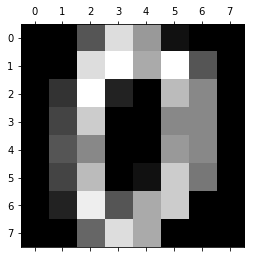

In [11]:
# following codes allow us to import useful libaries which we will utilize for data visualizatio and analysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# we are going to load a 'digits' dataset, which is a collection of handwritten digits (images) 
# and their true digits (target)

digits = datasets.load_digits()
X = digits.images
Y = digits.target

print("(Number of samples, feature dimension):", digits.data.shape)
print("(Number of images(data points), dimension of X):", X.shape)
print("(Number of target(data labels), dimension of Y):", Y.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

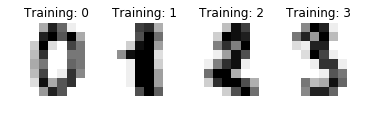

In [2]:
# To make it a little more interesting, let's try visualizing the first four images for digits
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

# Dataset

The dataset we loaded above, 'digits', correspond to 1797 images each with a true digit label (target).

These Dataset objects have X (features) and Y (classification) values which we can use for various kinds of analysis.

As we learned from the lecture, Dataset that has a target variable (labels) can be used for supervised learning (classification in this case of handwritten digit label prediction).

Digits dataset above has total of 1797 samples, each with an image (8x8, pixel matrix) along with a digit label (1, scaler)

Having nicely formatted dataset allows us to easily go ahead and make predictions, clusterings, or other type of analysis. In most cases, nevertheless, we may encounter issues for collecting and cleaning up our dataset.

Before making any analysis, it is important to be able to visualize (if possible) and understand the data we are to analyze, to correctly understand the problem and its behaviors, and thus select the best approach for 'learning'.

# Learning

Once we collect the data that is ready for making analysis, we can then apply appropriate algorithms for tasks such as regression, classification, or clustering.

To begin with, let us explore how we can model linear regressions and make predictions. Please refer to Eric's overview on Linear Regression before going forward.

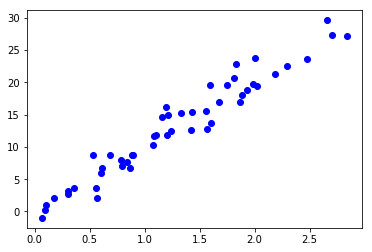

In [3]:
import scipy, numpy

# generate sample with error
n_size = 50
x = np.array(3 * np.random.rand(n_size)) # between 0 and 3
e = 2 * np.random.randn(x.size) # noise
y = np.array(10 * (x) + e) # some 'real' values (we let 'y' be observed values)

plt.plot(x,y,'bo')
plt.show()

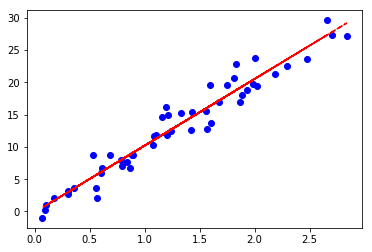

In [4]:
# mathematical fitting of linear regression (using Moore-Penrose pseudoinverse of matrix)
X = np.ones((x.size,2));
X[:,1] = x

Xpinv = np.linalg.inv(X.T.dot(X)).dot(X.T)
bHat = Xpinv.dot(y)
yHat = X.dot(bHat)

plt.plot(x,y,'bo'); 
plt.plot(x,yHat,'r--');
plt.show()

In [14]:
# Using scikit learn

import sklearn.linear_model

reg = linear_model.LinearRegression()

# Convert array of scaler values 'x', into array of 1-feature array, 
# the reason why we make conversion is because scikit-learn treats X, train set as set of features (array)
X = x[:, np.newaxis]

reg.fit(X, y)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(X) - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(X, y))

Coefficients: 
 [ 10.34149245]
Mean squared error: 3.36
Variance score: 0.94


# Interpretation

Note that we have 100% overfitted our data, without any cross-validation by splitting datasets on train vs. test

The results from fitting gives us the coefficient of 10.15718, which is indeed very close to actual value, 10.

Here, Mean squared error is at minimum value (minimized loss / optimized estimator).

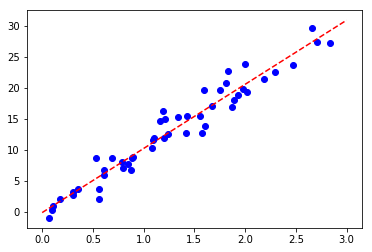

In [16]:
# We can make predictions with the linear regression model.
observed_X = np.linspace(0, 3, 30, endpoint=True)
observed_X = observed_X[:, np.newaxis]

predicted_Y = reg.predict(observed_X)

plt.plot(x, y,'bo'); 
plt.plot(observed_X, predicted_Y,'r--');
plt.show()

# Usage

Notice that the linear regression model achieved the same result compared with the mathematical fitting of linear regression by minimizing MSE.

Suppose we do not know the output value (y, target) for our input value 1.5 (x, input),
we can train a linear regression model (if dataset is likely within the linear class), and predict latent (output) values with just x.

In [17]:
predicted_value = reg.predict(1.5)
print(predicted_value)

[ 15.36899401]
